Análise dos dados de reembolso dos senadores - 2018

In [1]:
# importando as bibliotecas
import pandas as pd

In [16]:
# Carregar o arquivo csv
fname = 'despesa_ceaps_2018.csv'
# Separador do arquivo csv é ; 
df = pd.read_csv(fname, sep=';', encoding='latin1', skiprows=1, decimal=',')

In [17]:
df.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2018,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,NaN,02/01/2018,Despesa com pagamento de aluguel de imóvel par...,6000.00,2088462
1,2018,1,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,M2CJMM,02/01/2018,"Companhia Aérea: AVIANCA, Localizador: M2CJMM....",274.99,2088476
2,2018,1,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,SFEXYF,02/01/2018,"Companhia Aérea: LATAM, Localizador: SFEXYF. P...",1094.29,2088528
3,2018,1,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,V64HTR,24/01/2018,"Companhia Aérea: AZUL, Localizador: V64HTR. Pa...",1553.99,2088475
4,2018,2,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,002/18,01/02/2018,Despesa com pagamento de aluguel de imóvel par...,6000.00,2088477


In [18]:
# Verificar tamanhos e tipos dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24492 entries, 0 to 24491
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ANO                24492 non-null  int64  
 1   MES                24492 non-null  int64  
 2   SENADOR            24492 non-null  object 
 3   TIPO_DESPESA       24492 non-null  object 
 4   CNPJ_CPF           24492 non-null  object 
 5   FORNECEDOR         24492 non-null  object 
 6   DOCUMENTO          23476 non-null  object 
 7   DATA               24492 non-null  object 
 8   DETALHAMENTO       18882 non-null  object 
 9   VALOR_REEMBOLSADO  24492 non-null  float64
 10  COD_DOCUMENTO      24492 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 2.1+ MB


In [19]:
# Mostrar uma análise quantitativa dos dados
df.describe()

,ANO,MES,VALOR_REEMBOLSADO,COD_DOCUMENTO
count,24492.0,24492.000000,24492.000000,2.449200e+04
mean,2018.0,6.192226,1045.431215,2.100346e+06
std,0.0,3.305847,2718.840577,7.881637e+03
min,2018.0,1.000000,0.010000,2.085892e+06
25%,2018.0,3.000000,125.000000,2.093630e+06
50%,2018.0,6.000000,287.200000,2.100348e+06
75%,2018.0,9.000000,1032.005000,2.107072e+06
max,2018.0,12.000000,103900.000000,2.118038e+06


In [20]:
# Qual o total de reembolso
df['VALOR_REEMBOLSADO'].sum()

25604701.33

In [21]:
# Quantos reembolsos foram solicitados por cada senador?
df['SENADOR'].value_counts()

EDUARDO LOPES          864
PAULO BAUER            824
WELLINGTON FAGUNDES    800
JOSÉ SERRA             715
GLEISI HOFFMANN        653
                      ... 
ALVARO DIAS             40
FERNANDO COLLOR         27
JADER BARBALHO          19
CRISTOVAM BUARQUE       16
ZÉ SANTANA               8
Name: SENADOR, Length: 91, dtype: int64

In [24]:
# Quanto cada senador solicitou de reembolso?
df.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False)

SENADOR
EDUARDO BRAGA         529599.18
VANESSA GRAZZIOTIN    515969.63
JOÃO CAPIBERIBE       513333.90
ÂNGELA PORTELA        485806.44
OMAR AZIZ             484143.98
                        ...    
ALVARO DIAS            44037.88
WALTER PINHEIRO        32733.67
CRISTOVAM BUARQUE      32400.00
ZÉ SANTANA             23300.67
IONE GUIMARÃES         11379.91
Name: VALOR_REEMBOLSADO, Length: 91, dtype: float64

In [27]:
# Quais são os 5 maiores valores de reembolso?
df.nlargest(5,'VALOR_REEMBOLSADO').T

,21225,21488,21491,22666,5573
ANO,2018,2018,2018,2018,2018
MES,12,11,12,12,12
SENADOR,ROSE DE FREITAS,SÉRGIO PETECÃO,SÉRGIO PETECÃO,VANESSA GRAZZIOTIN,EDUARDO LOPES
TIPO_DESPESA,Divulgação da atividade parlamentar,"Contratação de consultorias, assessorias, pesq...","Contratação de consultorias, assessorias, pesq...","Contratação de consultorias, assessorias, pesq...",Divulgação da atividade parlamentar
CNPJ_CPF,05.461.408/0001-84,22.233.033/0001-14,22.233.033/0001-14,28.916.527/0001-80,14.616.988/0001-22
FORNECEDOR,Grafitusa S/A,Reis Grafica e Comercio de Etiquetas Eireli ME,Reis Grafica e Comercio de Etiquetas Eireli ME,A MAQUINA SOLUCOES EM MIDIA LTDA ME,NG Comunicação Visual Ltda
DOCUMENTO,000009681,4193,000004252,048,00000714
DATA,29/03/2019,29/11/2018,17/12/2018,17/12/2018,05/12/2018
DETALHAMENTO,NaN,NaN,NaN,TRABALHOS TÉCNICOS DE APOIO AO EXERCICIO DO MA...,NaN
VALOR_REEMBOLSADO,103900.0,102000.0,102000.0,100000.0,66000.0


In [29]:
# Quais são os 5 menores valores de reembolso?
df.nsmallest(5, 'VALOR_REEMBOLSADO').T

,3868,10161,10191,10196,10233
ANO,2018,2018,2018,2018,2018
MES,5,3,4,4,5
SENADOR,DÁRIO BERGER,JORGE VIANA,JORGE VIANA,JORGE VIANA,JORGE VIANA
TIPO_DESPESA,"Passagens aéreas, aquáticas e terrestres nacio...","Passagens aéreas, aquáticas e terrestres nacio...","Passagens aéreas, aquáticas e terrestres nacio...","Passagens aéreas, aquáticas e terrestres nacio...","Passagens aéreas, aquáticas e terrestres nacio..."
CNPJ_CPF,02.575.829/0001-48,33.937.681/0001-78,07.575.651/0001-59,33.937.681/0001-78,33.937.681/0001-78
FORNECEDOR,AVIANCA BRASIL,LATAM,GOL TRANSPORTES AÉREOS S/A,LATAM,LATAM
DOCUMENTO,K5RKJV,W4UUE7,ZHV36P,W6ZMK3,OZALEF
DATA,29/05/2018,21/03/2018,09/03/2018,17/04/2018,22/05/2018
DETALHAMENTO,"Companhia Aérea: AVIANCA, Localizador: K5RKJV....","Companhia Aérea: LATAM, Localizador: W4UUE7. P...","Companhia Aérea: GOL, Localizador: ZHV36P. Pas...","Companhia Aérea: LATAM, Localizador: W6ZMK3. P...","Companhia Aérea: LATAM, Localizador: OZALEF. P..."
VALOR_REEMBOLSADO,0.01,0.01,0.01,0.01,0.01


In [30]:
# Quantidade de reembolsos por tipo de despesas
df['TIPO_DESPESA'].value_counts()

Locomoção, hospedagem, alimentação, combustíveis e lubrificantes                                                                                                                                   10147
Passagens aéreas, aquáticas e terrestres nacionais                                                                                                                                                  5820
Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.                                                                                                            5042
Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos.      1761
Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar                                                              

In [35]:
# Quanto foi reembolsado por cada tipo de despesas
df.groupby('TIPO_DESPESA')['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False)

TIPO_DESPESA
Passagens aéreas, aquáticas e terrestres nacionais                                                                                                                                                 6335284.94
Locomoção, hospedagem, alimentação, combustíveis e lubrificantes                                                                                                                                   5620092.84
Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.                                                                                                           5041438.25
Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar                                                             4966449.41
Divulgação da atividade parlamentar                                                                                                                                

<AxesSubplot:xlabel='VALOR_REEMBOLSADO', ylabel='MES'>

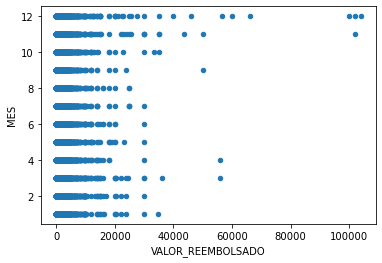

In [37]:
df.plot.scatter('VALOR_REEMBOLSADO','MES')

In [38]:
df.corr()

,ANO,MES,VALOR_REEMBOLSADO,COD_DOCUMENTO
ANO,NaN,NaN,NaN,NaN
MES,NaN,1.000000,0.045356,0.945720
VALOR_REEMBOLSADO,NaN,0.045356,1.000000,0.037036
COD_DOCUMENTO,NaN,0.945720,0.037036,1.000000


In [43]:
df.describe()

,ANO,MES,VALOR_REEMBOLSADO,COD_DOCUMENTO
count,24492.0,24492.000000,24492.000000,2.449200e+04
mean,2018.0,6.192226,1045.431215,2.100346e+06
std,0.0,3.305847,2718.840577,7.881637e+03
min,2018.0,1.000000,0.010000,2.085892e+06
25%,2018.0,3.000000,125.000000,2.093630e+06
50%,2018.0,6.000000,287.200000,2.100348e+06
75%,2018.0,9.000000,1032.005000,2.107072e+06
max,2018.0,12.000000,103900.000000,2.118038e+06
